# **Gradient Boost Step by Step**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.5 * np.random.rand(100)

In [3]:
df = pd.DataFrame()

In [4]:
df['X'] = X.reshape(100)
df['y'] = y

In [5]:
df

,X,y
0,-0.125460,0.062935
1,0.450714,0.927635
2,0.231994,0.318642
3,0.098658,0.283486
4,-0.343981,0.808753
...,...,...
95,-0.006204,0.174720
96,0.022733,0.364528
97,-0.072459,0.464306
98,-0.474581,1.119224


Text(0.5, 1.0, 'X vs Y')

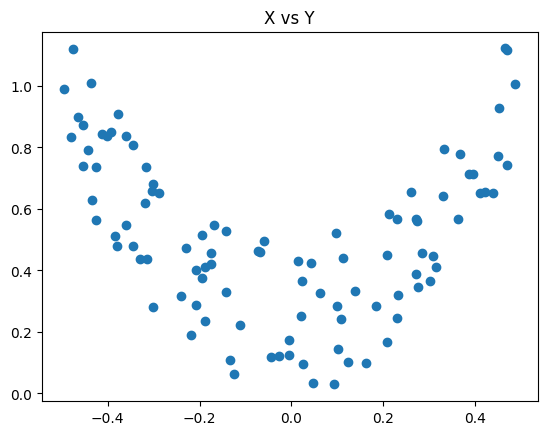

In [6]:
plt.scatter(df['X'], df['y'])
plt.title('X vs Y')

In [7]:
df['pred1'] = df['y'].mean()

In [8]:
df

,X,y,pred1
0,-0.125460,0.062935,0.514428
1,0.450714,0.927635,0.514428
2,0.231994,0.318642,0.514428
3,0.098658,0.283486,0.514428
4,-0.343981,0.808753,0.514428
...,...,...,...
95,-0.006204,0.174720,0.514428
96,0.022733,0.364528,0.514428
97,-0.072459,0.464306,0.514428
98,-0.474581,1.119224,0.514428


In [9]:
df['res1'] = df['y'] - df['pred1']

In [10]:
df

,X,y,pred1,res1
0,-0.125460,0.062935,0.514428,-0.451493
1,0.450714,0.927635,0.514428,0.413207
2,0.231994,0.318642,0.514428,-0.195787
3,0.098658,0.283486,0.514428,-0.230942
4,-0.343981,0.808753,0.514428,0.294324
...,...,...,...,...
95,-0.006204,0.174720,0.514428,-0.339708
96,0.022733,0.364528,0.514428,-0.149900
97,-0.072459,0.464306,0.514428,-0.050122
98,-0.474581,1.119224,0.514428,0.604796


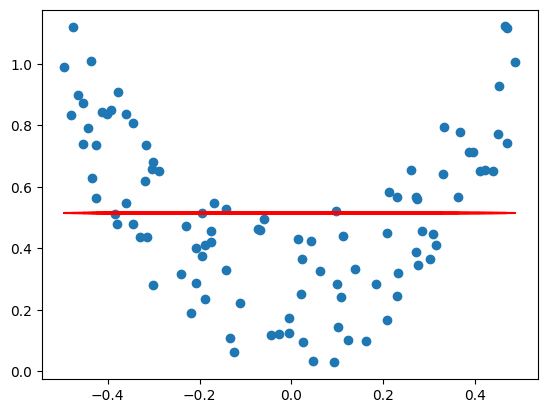

In [11]:
plt.scatter(df['X'], df['y'])
plt.plot(df['X'], df['pred1'], color='red')

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [14]:
tree1.fit(df['X'].values.reshape(100,1), df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

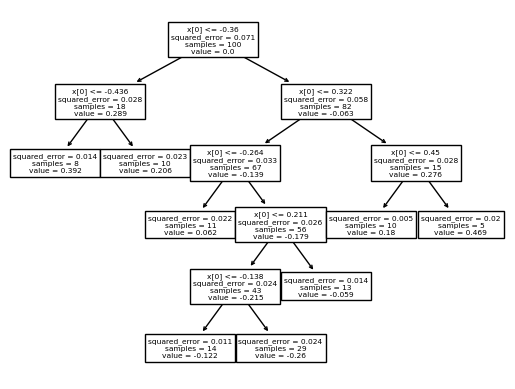

In [15]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [16]:
# generating X_test
X_test = np.linspace(-0.5, 0.5, 500)

In [17]:
y_pred = 0.265458 + tree1.predict(X_test.reshape(500,1))

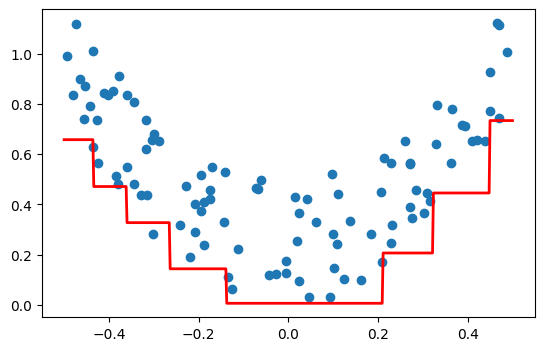

In [18]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2, color='red')
plt.scatter(df['X'], df['y'])

In [19]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))

In [20]:
df

,X,y,pred1,res1,pred2
0,-0.125460,0.062935,0.514428,-0.451493,0.005687
1,0.450714,0.927635,0.514428,0.413207,0.734004
2,0.231994,0.318642,0.514428,-0.195787,0.206160
3,0.098658,0.283486,0.514428,-0.230942,0.005687
4,-0.343981,0.808753,0.514428,0.294324,0.327124
...,...,...,...,...,...
95,-0.006204,0.174720,0.514428,-0.339708,0.005687
96,0.022733,0.364528,0.514428,-0.149900,0.005687
97,-0.072459,0.464306,0.514428,-0.050122,0.005687
98,-0.474581,1.119224,0.514428,0.604796,0.657922


In [21]:
df['res2'] = df['y'] - df['pred2']

In [22]:
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.062935,0.514428,-0.451493,0.005687,0.057248
1,0.450714,0.927635,0.514428,0.413207,0.734004,0.193631
2,0.231994,0.318642,0.514428,-0.195787,0.206160,0.112481
3,0.098658,0.283486,0.514428,-0.230942,0.005687,0.277799
4,-0.343981,0.808753,0.514428,0.294324,0.327124,0.481628
...,...,...,...,...,...,...
95,-0.006204,0.174720,0.514428,-0.339708,0.005687,0.169034
96,0.022733,0.364528,0.514428,-0.149900,0.005687,0.358842
97,-0.072459,0.464306,0.514428,-0.050122,0.005687,0.458619
98,-0.474581,1.119224,0.514428,0.604796,0.657922,0.461302


In [23]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [24]:
tree2.fit(df['X'].values.reshape(100,1), df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [25]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1,1)) for regressor in [tree1, tree2])

Text(0.5, 1.0, 'X vs Y')

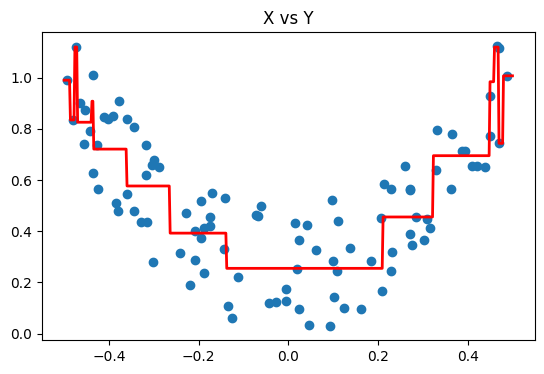

In [26]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2, color='red')
plt.scatter(df['X'], df['y'])
plt.title('X vs Y')

In [28]:
def gradient_boost(X,y, number, lr, count=1, regs=[], foo=None):
    if number == 0:
        return
    else:
        # do gredient boosting
        if count > 1:
            y = y - regs[-1].predict(X)
        else:
            foo = y 

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X,y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)

    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:,0], foo, 'r.')
    plt.show()

    gradient_boost(X,y, number-1, lr, count+1, regs, foo=foo)


5


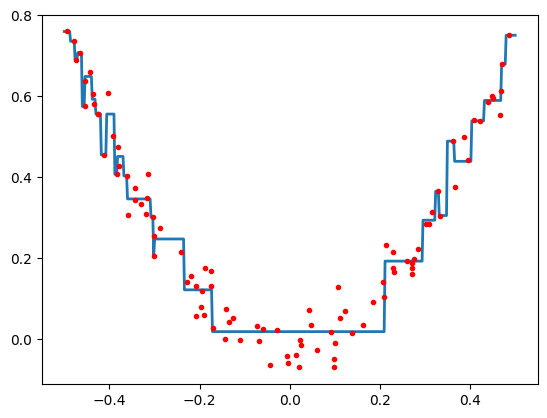

4


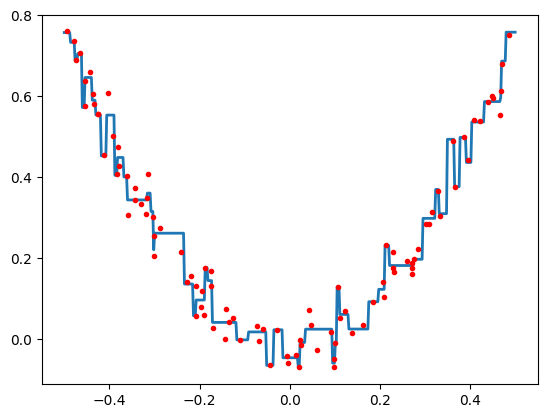

3


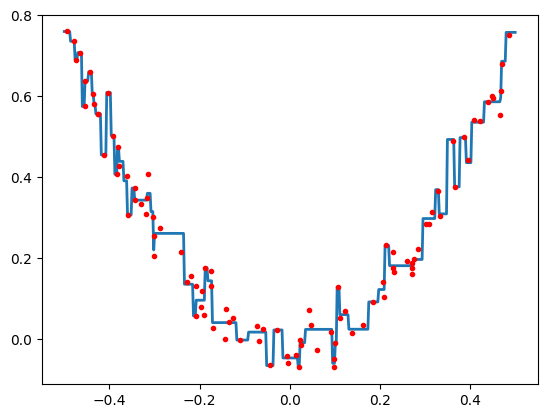

2


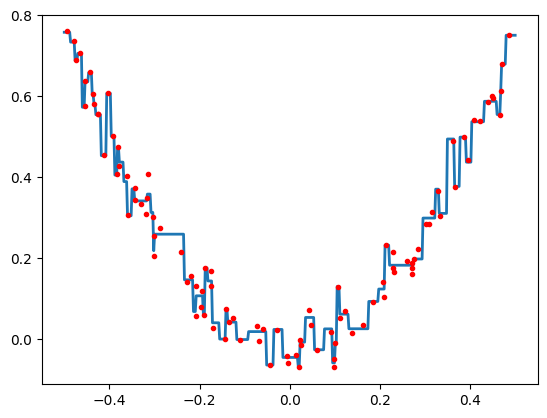

1


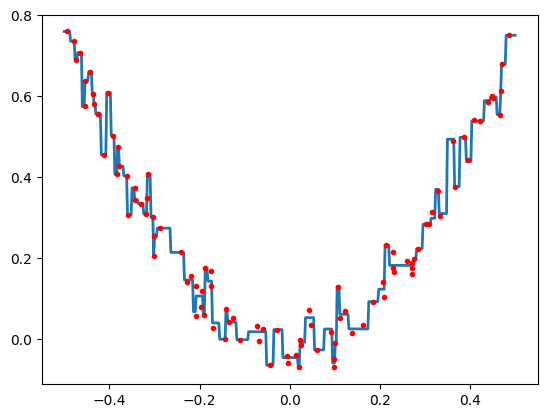

In [29]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)